In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("./data/analysed_project.csv", index_col=False)
df.head()

,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD,...,apartment_rooms_missing,apartment_bedrooms_missing,apartment_bathrooms_missing,price_in_USD_missing,building_construction_year_missing,apartment_total_area_m2,apartment_living_area_m2,area_from_title,area_from_title m²,property_type
0,turkey,"mediterranean region, turkey",2021.0,5.0,1.0,3.0,2.0,2.0,120 m²,315209.0,...,0,0,0,0,1,120.0,110,120.0,120.0,apartment
1,turkey,"kalkan, mediterranean region, kas, turkey",2021.0,2.0,4.0,2.0,2.0,1.0,500 m²,1108667.0,...,1,1,1,0,0,500.0,480,500.0,500.0,villa
2,turkey,"mediterranean region, antalya, turkey",2021.0,5.0,2.0,2.0,1.0,1.0,65 m²,173211.0,...,0,0,0,0,1,65.0,60,65.0,65.0,apartment
3,thailand,"chon buri province, pattaya, thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,99900.0,...,0,0,0,0,0,8800.0,40,NaN,NaN,apartment
4,thailand,"chon buri province, pattaya, thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,67000.0,...,0,0,0,0,0,8800.0,36,NaN,NaN,apartment


In [3]:
df.describe()

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD,building_total_floors_missing,apartment_floor_missing,apartment_rooms_missing,apartment_bedrooms_missing,apartment_bathrooms_missing,price_in_USD_missing,building_construction_year_missing,apartment_total_area_m2,apartment_living_area_m2,area_from_title,area_from_title m²
count,148536.000000,148536.000000,148536.000000,148536.000000,148536.000000,148536.000000,1.485360e+05,148536.000000,148536.000000,148536.000000,148536.000000,148536.000000,148536.000000,148536.000000,148536.000000,148536.000000,141796.000000,141796.000000
mean,2010.272877,6.742662,4.762159,2.292724,2.075322,1.144174,4.125029e+05,0.533958,0.625734,0.493874,0.744291,0.616436,0.017336,0.557555,522.008133,3756.025536,128.529719,128.529719
std,104.695260,6.105524,3.782078,0.983728,9.121028,0.500079,8.352735e+05,0.498847,0.483934,0.499964,0.436260,0.486255,0.130520,0.496678,1808.642193,1762.695800,120.899962,120.899962
min,1.000000,-1.000000,-2.000000,-1.000000,-1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,1.074335e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,4600.000000,57.000000,57.000000
50%,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,1.917700e+05,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,92.000000,4600.000000,88.000000,88.000000
75%,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,3.976822e+05,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,169.000000,4600.000000,150.000000,150.000000
max,2316.000000,124.000000,202.000000,124.000000,2009.000000,43.000000,3.060283e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8800.000000,4600.000000,998.000000,998.000000


In [4]:
df.duplicated().sum()

np.int64(6488)

In [5]:
df.drop_duplicates()

,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD,...,apartment_rooms_missing,apartment_bedrooms_missing,apartment_bathrooms_missing,price_in_USD_missing,building_construction_year_missing,apartment_total_area_m2,apartment_living_area_m2,area_from_title,area_from_title m²,property_type
0,turkey,"mediterranean region, turkey",2021.0,5.0,1.0,3.0,2.0,2.0,120 m²,315209.0,...,0,0,0,0,1,120.0,110,120.0,120.0,apartment
1,turkey,"kalkan, mediterranean region, kas, turkey",2021.0,2.0,4.0,2.0,2.0,1.0,500 m²,1108667.0,...,1,1,1,0,0,500.0,480,500.0,500.0,villa
2,turkey,"mediterranean region, antalya, turkey",2021.0,5.0,2.0,2.0,1.0,1.0,65 m²,173211.0,...,0,0,0,0,1,65.0,60,65.0,65.0,apartment
3,thailand,"chon buri province, pattaya, thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,99900.0,...,0,0,0,0,0,8800.0,40,NaN,NaN,apartment
4,thailand,"chon buri province, pattaya, thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,67000.0,...,0,0,0,0,0,8800.0,36,NaN,NaN,apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148531,brazil,waterfront,1998.0,30.0,27.0,5.0,1.0,1.0,NaN,270810.0,...,0,0,0,0,0,8800.0,4600,NaN,NaN,apartment
148532,france,business district,1990.0,30.0,10.0,1.0,1.0,3.0,NaN,1279290.0,...,0,0,0,0,0,8800.0,4600,NaN,NaN,penthouse
148533,usa,downtown,1961.0,18.0,8.0,4.0,2.0,3.0,NaN,534789.0,...,0,0,0,0,0,8800.0,4600,NaN,NaN,apartment
148534,uae,waterfront,2013.0,2.0,17.0,4.0,4.0,3.0,NaN,1884811.0,...,0,0,0,0,0,8800.0,4600,NaN,NaN,apartment


In [6]:
lower = df["price_in_USD"].quantile(0.005)
upper = df["price_in_USD"].quantile(0.995)

df_clean = df[(df["price_in_USD"] >= lower) & (df["price_in_USD"] <= upper)]

df = df_clean.copy()

In [7]:
df["price_in_USD"].max()

np.float64(5209647.0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147058 entries, 0 to 148535
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   country                             146928 non-null  object 
 1   location                            146927 non-null  object 
 2   building_construction_year          147058 non-null  float64
 3   building_total_floors               147058 non-null  float64
 4   apartment_floor                     147058 non-null  float64
 5   apartment_rooms                     147058 non-null  float64
 6   apartment_bedrooms                  147058 non-null  float64
 7   apartment_bathrooms                 147058 non-null  float64
 8   apartment_total_area                140426 non-null  object 
 9   price_in_USD                        147058 non-null  float64
 10  building_total_floors_missing       147058 non-null  int64  
 11  apartment_floor_missing        

### Converting the prices to log form for the model to learn better

In [9]:
df.shape

(147058, 22)

In [10]:
# Add log-transformed price
df["log_price"] = np.log1p(df["price_in_USD"])

# Quick check
df[["price_in_USD", "log_price"]].head()

,price_in_USD,log_price
0,315209.0,12.660994
1,1108667.0,13.918670
2,173211.0,12.062272
3,99900.0,11.511935
4,67000.0,11.112463


## Feature Engineering

**Real-estate prices are naturally skewed because a few apartments are extremely expensive while most are affordable. This skew affects model learning. To fix this, I applied a log transformation to the target variable. The log-transform reduces the impact of extreme values, stabilizes variance, and makes the pattern more linear. This helps the model learn better and improves prediction accuracy.**

In [11]:
#  Define numeric & categorical features
num_features = [
    'building_construction_year', 'building_total_floors', 'apartment_floor',
    'apartment_rooms', 'apartment_bedrooms', 'apartment_bathrooms',
    'apartment_total_area_m2', 'apartment_living_area_m2'
]

cat_features = ['property_type', 'location']

X = df[num_features + cat_features]
y = df['log_price'] # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (117646, 10)
X_test shape: (29412, 10)
y_train shape: (117646,)
y_test shape: (29412,)


### Creating Preproceseessing

In [13]:
# Numeric transformer
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical transformer
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Full preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

### Building the full pipeline

In [14]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=100, random_state=42,
        n_jobs=-1, verbose=0,
        min_samples_leaf=10, max_depth=10
    ))
])

### Training the model

In [15]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### predicting on test set

In [16]:
X_test.shape

(29412, 10)

In [17]:
# predict on test set
y_pred = pipeline.predict(X_test)
y_pred

array([12.69747   , 12.53897339, 14.17150294, ..., 12.68284497,
       12.503329  , 11.32753407], shape=(29412,))

### Building Baseline model

In [18]:
rf = RandomForestRegressor(
    n_estimators=100, random_state=42,
    n_jobs=-1, verbose=0,
    min_samples_leaf=10, max_depth=10
)

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", rf)
])

**Predicting on test set and then getting the metrics**

In [19]:
y_pred = pipeline.predict(X_test)

rf_pipeline =  rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

# getting the metrics (i.e. errors)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE: ", mae_rf)
print("Random Forest R2:", r2_rf)

Random Forest RMSE: 0.589898511896978
Random Forest MAE:  0.4254817497713393
Random Forest R2: 0.6782305704538105


**Printint converted logged price version inorder fot the RMSE and the R2 to display in the original unit**

In [20]:
# convert to USD
y_test_usd = np.expm1(y_test)
y_pred_usd = np.expm1(y_pred_rf)

rmse_rf_usd = np.sqrt(mean_squared_error(y_test_usd, y_pred_usd))
mae_rf_usd = mean_absolute_error(y_test_usd, y_pred_usd)
r2_rf_usd = r2_score(y_test_usd, y_pred_usd)

print("Random Forest RMSE (USD):", rmse_rf_usd)
print("Random Forest MSE (USD): ", mae_rf_usd)
print("Random Forest R2 (USD):", r2_rf_usd)

Random Forest RMSE (USD): 399043.98860262625
Random Forest MSE (USD):  171789.08166652865
Random Forest R2 (USD): 0.46960723240820346


### Build a dummy regressor

In [21]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

y_dummy_pred = dummy.predict(X_test)

rmse_dummy = np.sqrt(mean_squared_error(y_test, y_dummy_pred))
mae_dummy = mean_absolute_error(y_test, y_dummy_pred)
r2_dummy = r2_score(y_test, y_dummy_pred)

print("Dumy RMSE: ", rmse_dummy)
print("Dummy MAE: ", mae_dummy)
print ("R2 score: ", r2_dummy)

Dumy RMSE:  1.0399417480021809
Dummy MAE:  0.8132604451311178
R2 score:  -1.8894260467527957e-05


**I first built a Dummy Regressor as the baseline model.
This model does not learn from data instead, it simply predicts the average house price for every record.
The baseline achieved an RMSE of 1.04 and an R² of -1.89, which is expected.
Any useful model must perform better than this baseline.**

### Getting the cross validation error

In [22]:
cv_rmse = -cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=5,
    n_jobs=-1,
    scoring="neg_root_mean_squared_error"
)
print("CV RMSE scores:", cv_rmse)
print("Mean CV RMSE:", np.mean(cv_rmse))

CV RMSE scores: [0.58729231 0.59412587 0.58105857 0.58758782 0.59384304]
Mean CV RMSE: 0.5887815218523466


**This result shows that the model is doing great. Just have to tune it and that will lower the mean of the RMSE denoting the model performs accurately well**

### Fit the pipeline on the training set

In [23]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Evaluate Linear Regression Model

In [24]:
# creating linear regression pipeline
lr = LinearRegression()
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", lr)
])

# fit the model
lr_pipeline.fit(X_train, y_train)

# predict
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluating the model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression MAE: ", mae_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression RMSE: 0.6205537278094808
Linear Regression MAE:  0.4439417507292459
Linear Regression R²: 0.6439188719564979


**This shows the performance of the model is still ok even with LinearRegression since R2_score is greater than RMSE and RMSE is not up to 0.5**

In [25]:
# convert to USD
y_lr_test_usd = np.expm1(y_test)
y_lr_pred_usd = np.expm1(y_pred_rf)

rmse_lr_usd = np.sqrt(mean_squared_error(y_test_usd, y_pred_usd))
mae_lr_usd = mean_absolute_error(y_test_usd, y_pred_usd)
r2_lr_usd = r2_score(y_test_usd, y_pred_usd)

print("Random Forest RMSE (USD):", rmse_lr_usd)
print("Random Forest MAE (USD)", mae_lr_usd)
print("Random Forest R2 (USD):", r2_lr_usd)

Random Forest RMSE (USD): 399043.98860262625
Random Forest MAE (USD) 171789.08166652865
Random Forest R2 (USD): 0.46960723240820346


### Comparing the three models (DummyRegressor, Linear Regression, Random Forest)
**First storing the models in dictionary so as to makes the data organized and grouped**

In [26]:
results = {
    "Model": ["Dummy Regressor", "Linear Regression", "Random Forest"],
    "RMSE": [rmse_dummy, rmse_lr, rmse_rf],
    "MAE": [mae_dummy, mae_lr, mae_rf],
    "R2": [r2_dummy, r2_lr, r2_rf]
}

**Convert it to DataFrame for easy display**

In [27]:
results_df = pd.DataFrame(results)
results_df

,Model,RMSE,MAE,R2
0,Dummy Regressor,1.039942,0.813260,-0.000019
1,Linear Regression,0.620554,0.443942,0.643919
2,Random Forest,0.589899,0.425482,0.678231


**According to this comparison table, I have decided to chose RandomForest as my final model that i will be working with because it is the model with the lowest RMSE and highest R2. Therefore i will perform hyperparameter tuning on the RF since it is the best of the three models**  

### Visualizing the result

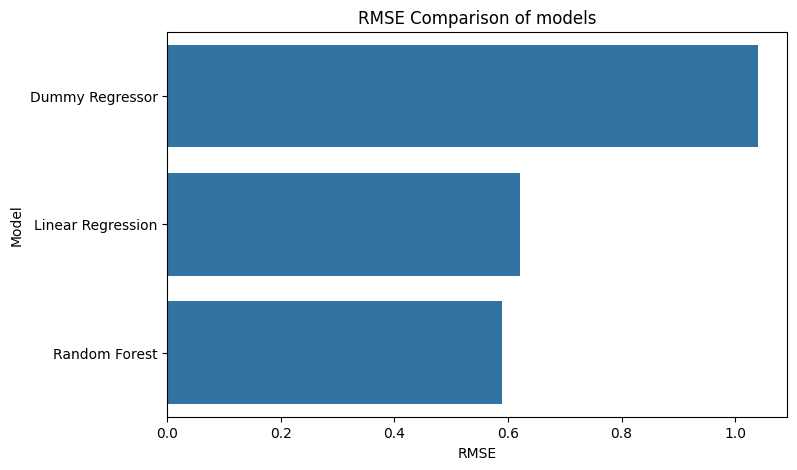

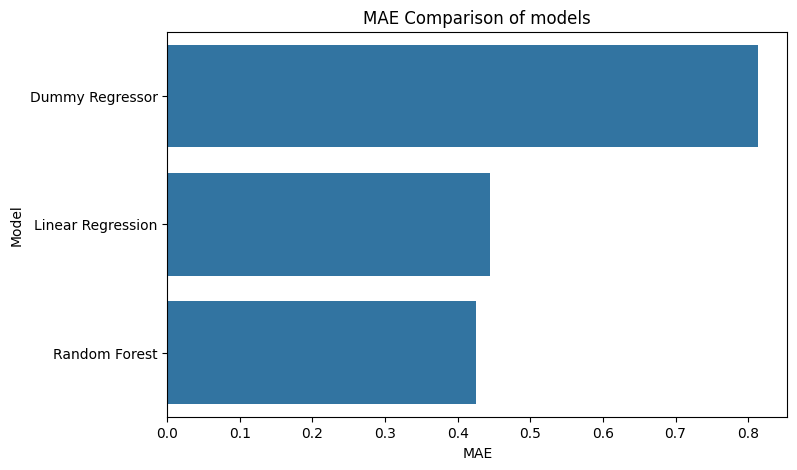

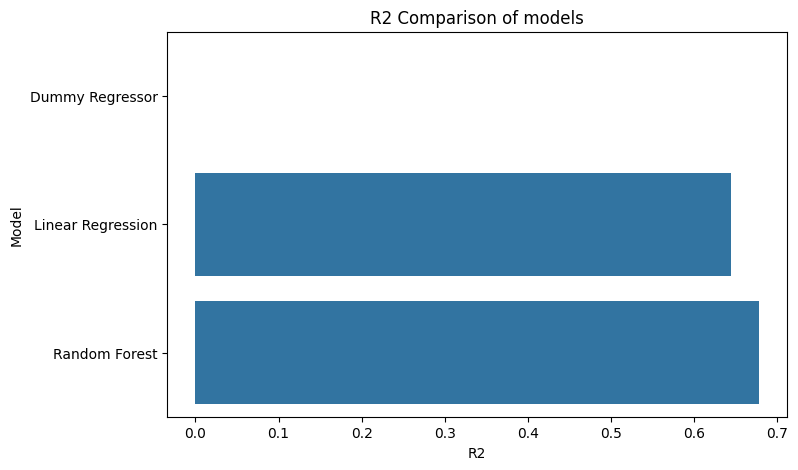

In [28]:
# RMSE comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="RMSE", y="Model", data=results_df)
plt.savefig(f"RMSE Comparison of models", dpi=300, bbox_inches="tight")
plt.title("RMSE Comparison of models")
plt.show()

# MAE comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="MAE", y="Model", data=results_df)
plt.savefig(f"MAE Comparison of models", dpi=300, bbox_inches="tight")
plt.title("MAE Comparison of models")
plt.show()

# R2 comparing
plt.figure(figsize=(8, 5))
sns.barplot(x="R2", y="Model", data=results_df)
plt.savefig(f"R2 Comparison of models", dpi=300, bbox_inches="tight")
plt.title("R2 Comparison of models")
plt.show()

**From this comparison, i discorvered that RandomForest model is the best model because it has it RMSE to be 0.58 anad it R2 to be0.68 which apparently is enough to chose it out of the three models that were built. So, I will build hyperpaarameter tuning on the Random Forest to make it more improved**

### Creating Final Comparison OF The Three Models

### Preprocessor

**As at this stage i am convinced the RandomForest model shows out to still be the best in it performance considering it RMSE being the lowest rmse and the r2_score as the highest when compared to other models which have higher RMSE more than that of RF and lower r2_score less than that of RF's** 

### Now create Hyperparameter Grid and RandomizedSearchCV

In [ ]:
# Define the Hyperparameter grid into Dictionary
param_grid = {"model__n_estimators": [50, 100, 150, 200]}

**Randomising search with 5-fold CV**

In [ ]:
random_search = RandomizedSearchCV(
    rf_pipeline, # pipeline with preprocessor and RandomFoerst
    param_distributions=param_grid,
    n_iter = 5, # number of random combination
    scoring="r2", # the metrics to optimze
    cv=5,         # 5-fold cross validation
    verbose = -1,
    random_state = 42,
    n_jobs =-1
)

**Fitting the model on training data**

In [ ]:
random_search.fit(X_train y_train)

**Getting the best parameters and scores**

In [ ]:
print ("Best R2: ", random_search.best_score_)
print ("Best Parameters: ", random_search.best_params_)

**So, since the reason for comparing model is actually to chose the best out of the three, and have discorvered RandmForest to be the best, i will be making hyperparameter tuning on the RF model since that is the model i chose to perform well. The essence of the Tuning is for the model to perform even more better than when un-tunned**

**Random Forest has many parameters; tuning improves performance. RandomizedSearchCV tries random combinations and picks the best. R2 and RMSE on test set after tuning show real performance. Always keep test set untouched until final evaluation.**

### Define hyperparameter Grid for Random Forest

In [ ]:
param_dist = {
    "model__n_estimators": [100, 200, 300, 500],
}

**Pipeline for tuning**

In [ ]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

**Running RandoMizedSearchCV for the model**

In [ ]:
rf_search = RandomizeSearchCV(
    estimator=rf_pipeline,
    para_distributions=param_dist,
    n_iter=5,
    cv=5,
    scoring="nrg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

In [ ]:
rf_search.fit(X_train, y_train)

**Printing out the best parameter**

In [ ]:
print("Best Parameter: ", rf_search.best_params_)
print("Best CV scores (RMSE): ", -rf_searc.best_score_)

**Evaluating the Model**

In [ ]:
best_rf = rf_search.best_estimator_

preds = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_preds))
r2 = r2_score(y_test, preds)

print ("Final Tuned RMSE: ", rmse)
print ("Final Tuned R2: ", r2)

y_test = np.exmp1(y_test)
y_pred = np.exmp1(y_preds)

**Compaing RF of before and after the tuning**

In [ ]:
comparison = pd.DataFrame({
    "Model": ["Random Forest (Default)", "Random Forest (Tuned)"],
    "RMSE": [rmse_rf, rmse_best],
    "R2": [r2_rf, r2_best]
})

comparison

**Now alalysing feature importance to know which of the features mostly influence the model expecially PRICE_IN_USD**
### Feature Importance

In [ ]:
# Extract the random forest inside the pipeline
rf_model = best_model.named_steps["rf"]

# Get one-hot feature names
ohe = best_model.named_steps[
    "preprocessor"].named_transformers_[
    "cat"].named_steps[
    "onehot"]
ohe_features = ohe.get_feature_names_out(cat_features)

# Combine numerical + categorical names
all_features = list(num_features) + list(ohe_features)

# Match RF feature importances with names
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feature_importance_df.head(15))

### Using HIstplot to visualize the feature importance

In [ ]:
# Creating a horizontal bar plot for the top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(
    x='importance', 
    y='feature', 
    data=feature_importance_df.head(15), 
    palette="magma"
)
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=16)
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.tight_layout() # Ensures labels don't get cut off
plt.show()

#### For easy and more clearified visualisation, i consider plotting a donut plot for it

In [ ]:
# making the top 10 important feature to display, i set it ina variable named 'N'
N = 10 

# preparing data for the variable and making a copy of N 
plot_data = feature_importance_df.head(N).copy()

# Calculating the sum of importance for all features outside the top N
other_importance = feature_importance_df.iloc[N:]["importance"].sum()

# Append the "Other Features" category
other_row = pd.DataFrame([["Other Features", other_importance]], columns=["feature", "importance"])
plot_data = pd.concat([plot_data, other_row], ignore_index=True)

# 2. Create the Donut Chart
plt.figure(figsize=(10, 10))

# Plot the pie chart
wedges, texts, autotexts = plt.pie(
    plot_data["importance"],
    autopct="%1.1f%%", # Format for percentages (e.g., 12.3%)
    startangle=90,
    pctdistance=0.85, # Position of the percentage text
    colors=plt.cm.tab20c(plot_data.index) # Use a good contrasting colormap
)

# Draw a white circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ensure the pie is a circle
plt.axis('equal') 

# Add legend using the feature names
plt.legend(
    wedges, 
    plot_data["feature"], 
    title="Feature Groups",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1) # Position the legend outside the plot
)
plt.title(f"Contribution of Top {N} Features to Total Importance", fontsize=16)
plt.tight_layout()
plt.show()

**These are some of the summary of the modelling** 

**Show Test R2 and RMSE. Mention: We only evaluate on the test set once, after tuning, to ensure the performance is unbiased. Show a prediction for a single apartment as a practical example.**
**We trained the model on log-transformed prices to reduce skewness and stabilize variance. For interpretability, we convert the predictions back to USD using np.expm1().**
**Random Forest provides feature importance. From our model, living area and total area are the strongest predictors of apartment prices, followed by the construction year. Missing data indicators have minor effects, showing that missing values slightly influence predictions.**
**Living area and total apartment area are the two most important predictors, followed by construction year. Features related to missing values have minor influence.**
**This plot shows the correlation of numeric features with apartment prices. Larger living areas and total areas are strongly positively correlated with price, while features indicating missing data have minimal impact.**